In [16]:
from IPython.display import clear_output
import numpy as np
import matplotlib.pyplot as plt
import cv2
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn import ensemble

!pip install ipython-autotime
%load_ext autotime

clear_output()
print("Done!")

Done!
time: 2.25 s (started: 2021-06-09 19:32:24 +00:00)


In [17]:
#@title Download the data!
!wget --no-check-certificate 'http://farsiocr.ir/Archive/DigitDB.zip'
!unzip DigitDB.zip

clear_output()
print("Done!")

Done!
time: 8.99 s (started: 2021-06-09 19:32:27 +00:00)


In [18]:
!wget --no-check-certificate 'https://raw.githubusercontent.com/amir-saniyan/HodaDatasetReader/master/HodaDatasetReader.py'

from HodaDatasetReader import read_hoda_cdb
data, y_train = np.array(read_hoda_cdb('Train 60000.cdb'))

clear_output()
print(data.shape)

(60000,)
time: 6.25 s (started: 2021-06-09 19:32:36 +00:00)


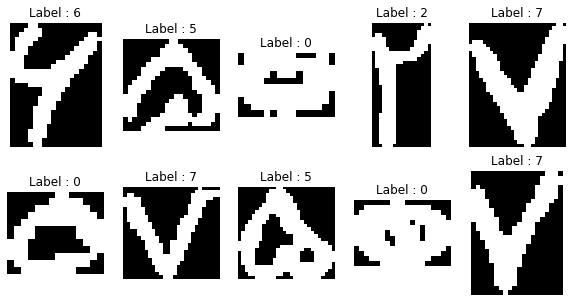

time: 387 ms (started: 2021-06-09 18:53:11 +00:00)


In [4]:
#@title Visualize
fig, ax = plt.subplots(2, 5, figsize=(10,5))

sampled_indices = range(10)
sampled = data[sampled_indices]
sampled_labels = y_train[sampled_indices]

for row in range (2):
  for col in range (5):
    sample = sampled[row*5 + col]
    label = sampled_labels[row*5 + col]
    ax[row][col].imshow(sample, cmap='gray')
    ax[row][col].axis('off')
    ax[row][col].set_title("Label : "+ str(label))
fig.show()

In [5]:
def reshape_images(dataset, size):
  result = []
  for d in dataset:
    height, width = d.shape
    ww = max(height, width)
    pad = np.zeros((ww, ww))
    xx = (ww - width) // 2
    yy = (ww - height) // 2
    pad[yy:yy+height, xx:xx+width] = d
    result.append(cv2.resize(pad, (size, size)))
  return np.array(result)

x, y = data[0].shape
print(x, y)
scaled_data = reshape_images(data, size=28)

27 20
time: 865 ms (started: 2021-06-09 18:53:12 +00:00)


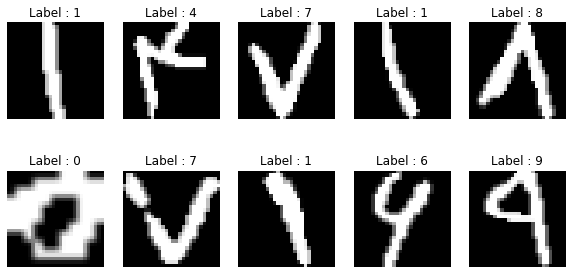

time: 306 ms (started: 2021-06-09 18:53:12 +00:00)


In [6]:
fig, ax = plt.subplots(2, 5, figsize=(10,5))

sampled_indices = np.random.randint(scaled_data.shape[0], size=10)
sampled = scaled_data[sampled_indices]
sampled_labels = y_train[sampled_indices]

for row in range (2):
  for col in range (5):
    sample = sampled[row*5 + col]
    label = sampled_labels[row*5 + col]
    ax[row][col].imshow(sample, cmap='gray')
    ax[row][col].axis('off')
    ax[row][col].set_title("Label : "+ str(label))
fig.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


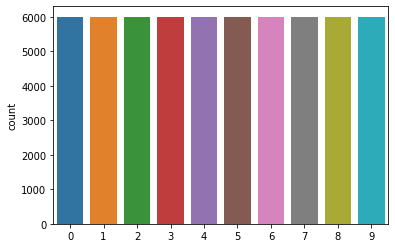

time: 256 ms (started: 2021-06-09 18:53:13 +00:00)


In [7]:
sns.countplot(y_train)

In [8]:
test_data, y_test = np.array(read_hoda_cdb('Test 20000.cdb'))
scaled_test_data = reshape_images(test_data, size=28)

clear_output()
print(y_test.shape)

(20000,)
time: 2.28 s (started: 2021-06-09 18:53:13 +00:00)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


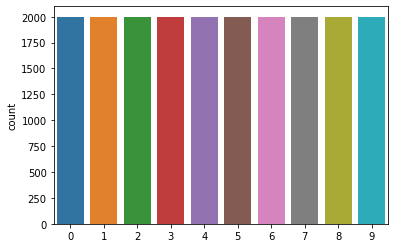

time: 212 ms (started: 2021-06-09 18:53:15 +00:00)


In [9]:
sns.countplot(y_test)

# Input pipeline

In [10]:
#@title Initialization & dependencies
batch_size =  128#@param {type:"integer"}
shuffle_buffer_size =  100#@param {type:"integer"}

import tensorflow as tf
import numpy as np

time: 1.39 s (started: 2021-06-09 18:53:16 +00:00)


In [11]:
scaled_data = np.asarray(scaled_data).astype('float32')
y_train = np.asarray(y_train).astype('int32')

scaled_test_data = np.asarray(scaled_test_data).astype('float32')
y_test = np.asarray(y_test).astype('int32')

train_ds = tf.data.Dataset.from_tensor_slices((scaled_data, y_train))
test_ds = tf.data.Dataset.from_tensor_slices((scaled_test_data, y_test))

time: 5.01 s (started: 2021-06-09 18:53:17 +00:00)


In [12]:
train_ds = train_ds.map(lambda img, label: (img/255., label))
train_ds = train_ds.cache()
train_ds = train_ds.shuffle(shuffle_buffer_size)
train_ds = train_ds.batch(batch_size)
train_ds = train_ds.prefetch(tf.data.experimental.AUTOTUNE)

time: 47.5 ms (started: 2021-06-09 18:53:22 +00:00)


In [13]:
test_ds = test_ds.map(lambda img, label: (img/255., label))
test_ds = test_ds.cache()
test_ds = test_ds.shuffle(shuffle_buffer_size)
test_ds = test_ds.batch(batch_size)
test_ds = test_ds.prefetch(tf.data.experimental.AUTOTUNE)

time: 14.2 ms (started: 2021-06-09 18:53:22 +00:00)


# Model

In [19]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)
])

time: 26.6 ms (started: 2021-06-09 19:32:47 +00:00)


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
time: 4.88 ms (started: 2021-06-09 18:54:51 +00:00)


# Adam

In [20]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)
history = model.fit(
    train_ds,
    epochs=20,
    validation_data=test_ds,
)

Epoch 1/20
469/469 [==============================] - 6s 6ms/step - loss: 0.1774 - sparse_categorical_accuracy: 0.9496 - val_loss: 0.1789 - val_sparse_categorical_accuracy: 0.9467
Epoch 2/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0688 - sparse_categorical_accuracy: 0.9811 - val_loss: 0.1401 - val_sparse_categorical_accuracy: 0.9560
Epoch 3/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0472 - sparse_categorical_accuracy: 0.9868 - val_loss: 0.1177 - val_sparse_categorical_accuracy: 0.9623
Epoch 4/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0347 - sparse_categorical_accuracy: 0.9904 - val_loss: 0.1035 - val_sparse_categorical_accuracy: 0.9670
Epoch 5/20
469/469 [==============================] - 2s 3ms/step - loss: 0.0260 - sparse_categorical_accuracy: 0.9930 - val_loss: 0.0954 - val_sparse_categorical_accuracy: 0.9710
Epoch 6/20
469/469 [==============================] - 1s 3ms/step - loss: 0.0201 - sparse_categorica

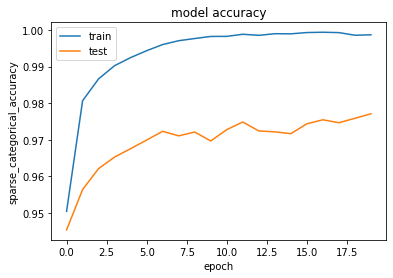

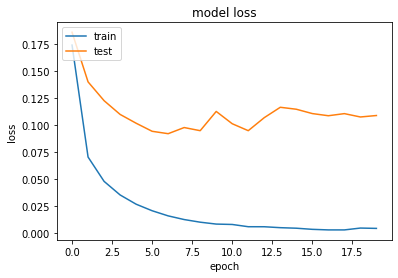

time: 357 ms (started: 2021-06-05 10:27:55 +00:00)


In [ ]:
کimport matplotlib.pyplot as plt

plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('sparse_categorical_accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# SGD with Momentum

In [ ]:
model.reset_states()
model.reset_metrics()

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)
history = model.fit(
    train_ds,
    epochs=20,
    validation_data=test_ds,
)

Epoch 1/20
469/469 [==============================] - 2s 4ms/step - loss: 1.7458 - sparse_categorical_accuracy: 0.5164 - val_loss: 1.4645 - val_sparse_categorical_accuracy: 0.6428
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 1.0429 - sparse_categorical_accuracy: 0.8108 - val_loss: 1.0845 - val_sparse_categorical_accuracy: 0.7084
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.7302 - sparse_categorical_accuracy: 0.8574 - val_loss: 0.9004 - val_sparse_categorical_accuracy: 0.7384
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.5754 - sparse_categorical_accuracy: 0.8762 - val_loss: 0.7945 - val_sparse_categorical_accuracy: 0.7596
Epoch 5/20
469/469 [==============================] - 2s 3ms/step - loss: 0.4872 - sparse_categorical_accuracy: 0.8892 - val_loss: 0.7247 - val_sparse_categorical_accuracy: 0.7760
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.4305 - sparse_categorica

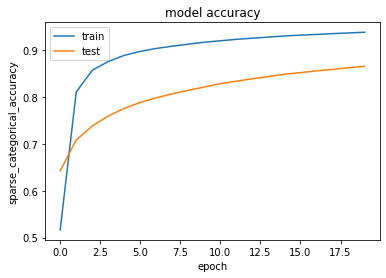

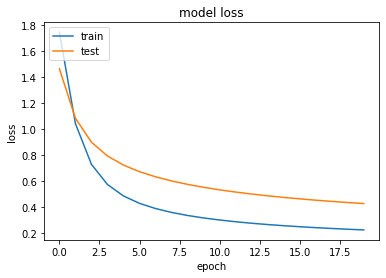

time: 351 ms (started: 2021-06-05 10:30:32 +00:00)


In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('sparse_categorical_accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()